In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = load_digits()

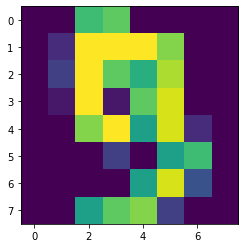

In [5]:
plt.imshow(digits.images[9])

In [6]:
digits.target[9]

9

In [7]:
data = pd.DataFrame(digits.data)
data['target'] = digits.target
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [9]:
x = data.drop('target',axis=1)

In [10]:
y = data['target']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state = 10)

In [32]:
model = RandomForestClassifier(n_estimators=47, random_state = 34)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=47, random_state=34)

In [33]:
model.score(x_test,y_test)

0.9711111111111111

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
y_pred = model.predict(x_test)

In [40]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[45,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  1,  0],
       [ 0,  2,  1,  1,  0,  1,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 45]], dtype=int64)

Text(33.0, 0.5, 'predicted value')

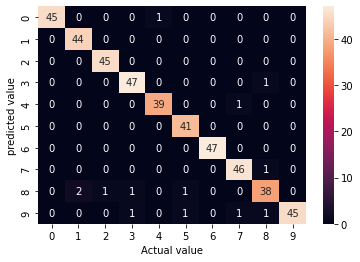

In [48]:
plt.Figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual value')
plt.ylabel('predicted value')